## Notebook for learning how to run simulation batches

First import required model and its parameters.

In [1]:
from ModularCirc.Models.KorakianitisMixedModel import KorakianitisMixedModel, KorakianitisMixedModel_parameters, TEMPLATE_TIME_SETUP_DICT
import numpy as np

Introducing `BatchRunner` a new class which is meant to facilitate running batches of simulations.

In [2]:
from ModularCirc import BatchRunner

Instantiate `BatchRunner` providing the sampling method used to define the batch.

In [3]:
br = BatchRunner('LHS', 0) #LHS = Latin HyperCube

Provide the json file detailing the parameter ranges, where these are sampled, or values, where they are constant.

```json
{
    COMPONENT_TYPE_1 : {
        COMPONENT_1 : [
            PARAMETER_1 : [VALUE, [SCALE_RANGE_MIN, SCALE_RANGE_MAX]],
            PARAMETER_2 : [CONSTANT],
            PARAMETER_3 : ...,
        ...
        ]
        COMPONENT_2 : ...
        ...
    }
    COMPONENT_TYPE_2 : ...
    ...
}
```

In [4]:
# Parameters_01 = Korakianitis Model
br.setup_sampler('parameters_02.json')

### **Sample:**

In [5]:
# Set number of samples 
br.sample(10)

In [6]:
# Sampled parameter list
br.samples.columns

# Print sampled data
br.samples

,sas.r,sas.c,sas.l,sat.r,sat.c,sat.l,svn.r,svn.c,pas.r,pas.c,...,ao.RRA,mi.RRA,po.RRA,ti.RRA,lv.v,la.tpwb,la.v,rv.v,ra.tpwb,ra.v
0,0.001909,0.093842,0.000043,0.854232,0.829877,0.001545,0.092950,14.904532,0.001891,0.235169,...,0,0,0,0,20,0,20,20,0,20
1,0.004322,0.077297,0.000084,0.974741,1.243655,0.002444,0.059370,20.843079,0.002643,0.103691,...,0,0,0,0,20,0,20,20,0,20
2,0.002876,0.058124,0.000070,1.184270,2.061611,0.001746,0.068044,22.615751,0.001597,0.110454,...,0,0,0,0,20,0,20,20,0,20
3,0.002434,0.118193,0.000067,1.146149,2.306220,0.002116,0.083927,25.501024,0.002942,0.262568,...,0,0,0,0,20,0,20,20,0,20
4,0.003036,0.083914,0.000047,0.642544,1.389449,0.001499,0.105899,10.634712,0.002266,0.162749,...,0,0,0,0,20,0,20,20,0,20
5,0.001747,0.052895,0.000062,1.420331,1.905957,0.001973,0.060949,29.781784,0.001017,0.202213,...,0,0,0,0,20,0,20,20,0,20
6,0.003902,0.065750,0.000034,1.345779,1.619595,0.001005,0.099687,27.082233,0.002440,0.192199,...,0,0,0,0,20,0,20,20,0,20
7,0.003473,0.107310,0.000080,0.542087,1.010552,0.001050,0.075774,17.254194,0.001792,0.221193,...,0,0,0,0,20,0,20,20,0,20
8,0.002163,0.043545,0.000092,1.545321,2.238057,0.002259,0.047124,19.175608,0.001278,0.160673,...,0,0,0,0,20,0,20,20,0,20
9,0.003744,0.100586,0.000056,0.942239,1.448796,0.001332,0.038610,12.664619,0.002122,0.135598,...,0,0,0,0,20,0,20,20,0,20


### Rescale the timing parameters and map to actual parameters where appropriate.

In [7]:
TEMPLATE_TIME_SETUP_DICT

{'name': 'TimeTest',
 'ncycles': 30,
 'tcycle': 1.0,
 'dt': 0.001,
 'export_min': 2}

In [8]:
map_ = {
    'delay' : ['la.delay', 'ra.delay'],
    'td0'   : ['lv.td0',   'rv.td0' ],
    'tr'    : ['lv.tr',    'rv.tr'  ],
    'tpww'  : ['la.tpww',  'ra.tpww'],
}
br.map_sample_timings(
    ref_time=1.,
    map=map_
    )

In [9]:
br.samples.columns

Index(['sas.r', 'sas.c', 'sas.l', 'sat.r', 'sat.c', 'sat.l', 'svn.r', 'svn.c',
       'pas.r', 'pas.c', 'pas.l', 'pat.r', 'pat.c', 'pat.l', 'pvn.r', 'pvn.c',
       'ao.CQ', 'mi.CQ', 'po.CQ', 'ti.CQ', 'lv.E_pas', 'lv.E_act', 'lv.v_ref',
       'lv.k_pas', 'la.E_pas', 'la.E_act', 'la.v_ref', 'la.k_pas', 'rv.E_pas',
       'rv.E_act', 'rv.v_ref', 'rv.k_pas', 'ra.E_pas', 'ra.E_act', 'ra.v_ref',
       'ra.k_pas', 'T', 'v_tot', 'sas.v_ref', 'sat.v_ref', 'svn.l',
       'svn.v_ref', 'pas.v_ref', 'pat.v_ref', 'pvn.l', 'pvn.v_ref', 'ao.RRA',
       'mi.RRA', 'po.RRA', 'ti.RRA', 'lv.v', 'la.tpwb', 'la.v', 'rv.v',
       'ra.tpwb', 'ra.v', 'la.delay', 'ra.delay', 'lv.td0', 'rv.td0', 'lv.tr',
       'rv.tr', 'la.tpww', 'ra.tpww'],
      dtype='object')

In [10]:
br._samples[['lv.td', 'rv.td']] = br._samples[['lv.tr', 'rv.tr']].values + br._samples[['lv.td0', 'rv.td0']].values
br._samples.drop(['lv.td0', 'rv.td0'], axis=1, inplace=True)

In [11]:
br.samples

,sas.r,sas.c,sas.l,sat.r,sat.c,sat.l,svn.r,svn.c,pas.r,pas.c,...,ra.tpwb,ra.v,la.delay,ra.delay,lv.tr,rv.tr,la.tpww,ra.tpww,lv.td,rv.td
0,0.001909,0.093842,0.000043,0.854232,0.829877,0.001545,0.092950,14.904532,0.001891,0.235169,...,0,20,0.146502,0.146502,0.253895,0.253895,0.078664,0.078664,0.398925,0.398925
1,0.004322,0.077297,0.000084,0.974741,1.243655,0.002444,0.059370,20.843079,0.002643,0.103691,...,0,20,0.181227,0.181227,0.339618,0.339618,0.067751,0.067751,0.500608,0.500608
2,0.002876,0.058124,0.000070,1.184270,2.061611,0.001746,0.068044,22.615751,0.001597,0.110454,...,0,20,0.099226,0.099226,0.129739,0.129739,0.095087,0.095087,0.284956,0.284956
3,0.002434,0.118193,0.000067,1.146149,2.306220,0.002116,0.083927,25.501024,0.002942,0.262568,...,0,20,0.110965,0.110965,0.198263,0.198263,0.061940,0.061940,0.293071,0.293071
4,0.003036,0.083914,0.000047,0.642544,1.389449,0.001499,0.105899,10.634712,0.002266,0.162749,...,0,20,0.144577,0.144577,0.236328,0.236328,0.050992,0.050992,0.313832,0.313832
5,0.001747,0.052895,0.000062,1.420331,1.905957,0.001973,0.060949,29.781784,0.001017,0.202213,...,0,20,0.085862,0.085862,0.157425,0.157425,0.071983,0.071983,0.246975,0.246975
6,0.003902,0.065750,0.000034,1.345779,1.619595,0.001005,0.099687,27.082233,0.002440,0.192199,...,0,20,0.054481,0.054481,0.152777,0.152777,0.023865,0.023865,0.224253,0.224253
7,0.003473,0.107310,0.000080,0.542087,1.010552,0.001050,0.075774,17.254194,0.001792,0.221193,...,0,20,0.115127,0.115127,0.149349,0.149349,0.072146,0.072146,0.244274,0.244274
8,0.002163,0.043545,0.000092,1.545321,2.238057,0.002259,0.047124,19.175608,0.001278,0.160673,...,0,20,0.159190,0.159190,0.267256,0.267256,0.065535,0.065535,0.340033,0.340033
9,0.003744,0.100586,0.000056,0.942239,1.448796,0.001332,0.038610,12.664619,0.002122,0.135598,...,0,20,0.071103,0.071103,0.086863,0.086863,0.026589,0.026589,0.135646,0.135646


use `map_vessel_volumes` to define the initial distribution of blood in the vessels

In [12]:
br.map_vessel_volume()

In [13]:
# Quick stats on some parameters
br._samples[['sas.v', 'sat.v', 'svn.v', 'pas.v', 'pat.v', 'pvn.v']].describe().T

,count,mean,std,min,25%,50%,75%,max
sas.v,10.0,2.462019,1.808967,0.427541,1.256128,1.482445,3.707581,6.014230
sat.v,10.0,43.740897,23.509843,15.405378,22.740929,42.398316,58.179500,85.270591
svn.v,10.0,538.554958,265.233877,150.983351,373.527432,526.972139,629.044554,955.218009
pas.v,10.0,5.403984,4.211406,1.634441,2.524094,4.273193,6.350228,15.071750
pat.v,10.0,66.324564,41.786939,15.096940,41.349880,66.429557,78.961177,164.394456
pvn.v,10.0,575.177739,305.940953,105.481174,325.384094,586.076845,813.655787,1027.983099


Provide the model you want to be run on the parameters.

In [14]:
br.setup_model(model=KorakianitisMixedModel, po=KorakianitisMixedModel_parameters, time_setup=TEMPLATE_TIME_SETUP_DICT)

Set output path

In [15]:
import os

In [16]:
path = os.getcwd()
path

'/Users/pmzff/Documents/GitHub/ModularCircFF/Tutorials/Tutorial_03'

Run simulations

In [17]:
os.system(f'mkdir -p {path+'/Outputs/Out_02'}')
test = br.run_batch(n_jobs=5, output_path=path+'/Outputs/Out_02')

100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


In [18]:
# Each row of the sampled parameters (realisations) gives 1000 rows (time_ind) of output for the 31 output parameters.
test

[                            v_la        v_lv      v_sas       v_sat  \
 realization time_ind                                                  
 0           0         280.311926  294.683985  13.450126  118.925171   
             1         280.322098  294.683985  13.440575  118.840730   
             2         280.332236  294.683985  13.431034  118.756367   
             3         280.342340  294.683985  13.421501  118.672081   
             4         280.352413  294.683985  13.411977  118.587873   
 ...                          ...         ...        ...         ...   
             995       280.556207  294.875581  13.548066  119.791091   
             996       280.566516  294.875581  13.538406  119.705681   
             997       280.576783  294.875581  13.528756  119.620350   
             998       280.587012  294.875581  13.519114  119.535096   
             999       280.597203  294.875581  13.509481  119.449920   
 
                            v_svn        v_ra        v_rv     

In [19]:
# Output of first realisation
ind = 0
test[ind].loc[ind]


,v_la,v_lv,v_sas,v_sat,v_svn,v_ra,v_rv,v_pas,v_pat,v_pvn,...,q_po,p_pas,p_pat,q_pas,p_pvn,q_pat,p_la,q_pvn,q_mi,T
time_ind,,,,,,,,,,,,,,,,,,,,,
0,280.311926,294.683985,13.450126,118.925171,575.407008,198.983499,206.738117,15.250047,81.482774,432.807490,...,-0.0,64.847268,64.817572,16.152836,26.983169,102.426472,26.925106,13.310457,-0.0,3.063001
1,280.322098,294.683985,13.440575,118.840730,575.319788,199.164709,206.738117,15.237691,81.416776,432.875673,...,-0.0,64.794724,64.765072,16.128632,26.987420,102.272857,26.929559,13.264104,-0.0,3.063766
2,280.332236,294.683985,13.431034,118.756367,575.233027,199.345375,206.738117,15.225353,81.350877,432.943773,...,-0.0,64.742259,64.712651,16.104474,26.991665,102.119467,26.933997,13.219879,-0.0,3.064532
3,280.342340,294.683985,13.421501,118.672081,575.146723,199.525498,206.738117,15.213033,81.285077,433.011788,...,-0.0,64.689872,64.660308,16.080358,26.995906,101.966303,26.938422,13.177602,-0.0,3.065297
4,280.352413,294.683985,13.411977,118.587873,575.060877,199.705076,206.738117,15.200732,81.219375,433.079718,...,-0.0,64.637564,64.608045,16.056279,27.000141,101.813364,26.942834,13.137118,-0.0,3.066063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,280.556207,294.875581,13.548066,119.791091,573.047165,197.696832,206.557819,15.359741,82.068796,434.538844,...,-0.0,65.313714,65.283738,16.305808,27.091109,103.396207,27.032246,13.493962,-0.0,3.824732
996,280.566516,294.875581,13.538406,119.705681,572.958854,197.880212,206.557819,15.347267,82.002173,434.607632,...,-0.0,65.260672,65.230741,16.281317,27.095398,103.241153,27.036776,13.438460,-0.0,3.825497
997,280.576783,294.875581,13.528756,119.620350,572.870995,198.063054,206.557819,15.334812,81.935650,434.676342,...,-0.0,65.207710,65.177824,16.256877,27.099681,103.086323,27.041290,13.385850,-0.0,3.826263


In [20]:
# Summary stats of output of first realisation
ind = 0
test[ind].loc[ind].describe()

,v_la,v_lv,v_sas,v_sat,v_svn,v_ra,v_rv,v_pas,v_pat,v_pvn,...,q_po,p_pas,p_pat,q_pas,p_pvn,q_pat,p_la,q_pvn,q_mi,T
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,278.527723,245.355840,17.450125,154.045243,582.959698,207.387959,143.492824,22.010263,117.239220,449.571246,...,175.897023,93.593508,93.260958,175.827683,28.028297,175.495971,27.274567,172.786458,172.344082,3.445397
std,9.399402,52.187671,3.124528,27.695066,10.260935,19.708283,49.659088,4.814702,25.711407,23.279194,...,342.902825,20.473397,20.452801,291.066948,1.451330,52.565484,2.361619,452.502497,421.646339,0.221108
min,238.750421,162.892958,12.563617,110.892540,567.873388,173.627939,72.084144,14.723523,78.495375,419.187239,...,-0.000000,62.608344,62.441168,15.120414,26.134021,95.168156,21.170532,-1046.656391,-0.000000,3.063001
25%,277.507020,185.390379,14.652724,129.367634,574.014849,190.372142,88.097758,17.611460,93.766750,431.483720,...,-0.000000,74.888623,74.589177,21.438866,26.900639,126.552588,26.180503,22.623627,-0.000000,3.254199
50%,280.409006,276.323023,17.216563,151.993415,582.058499,203.845439,156.701767,21.538091,114.709164,441.693908,...,-0.000000,91.585706,91.248360,29.745400,27.537188,174.696875,27.144734,30.048239,-0.000000,3.445397
75%,283.845350,294.247188,20.196183,178.434259,590.978772,226.942169,187.112071,26.368893,140.530326,466.425022,...,140.887158,112.127563,111.788469,150.733251,29.079037,220.234420,28.967635,75.933019,31.337507,3.636596
max,288.911489,294.875581,22.656388,200.247073,601.758533,238.452892,206.738117,29.757664,158.586617,498.518900,...,1144.040070,126.537520,126.151810,992.536919,31.079914,261.649310,32.843216,1562.575057,1855.555576,3.827794


In [21]:
import matplotlib.pyplot as plt

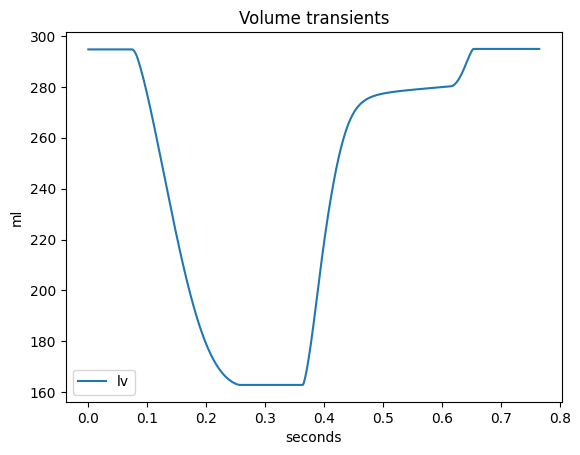

In [22]:
ind = 0
t = test[ind].loc[ind]['T'] - test[ind].loc[ind]['T'].loc[0]

fig, ax = plt.subplots()

ax.plot(t, test[ind].loc[ind]['v_lv'], label='lv')


ax.set_xlabel('seconds')
ax.set_ylabel('ml')

ax.legend()
ax.set_title('Volume transients')

plt.show()

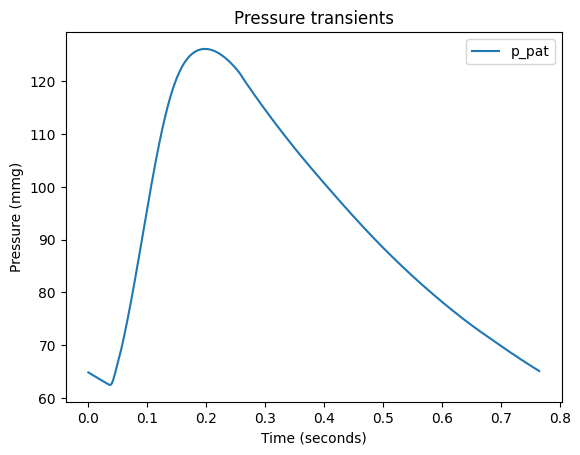

In [23]:
ind = 0
t = test[ind].loc[ind]['T'] - test[ind].loc[ind]['T'].loc[0]

fig, ax = plt.subplots()

ax.plot(t, test[ind].loc[ind]['p_pat'], label='p_pat')


ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Pressure (mmg)')

ax.legend()
ax.set_title('Pressure transients')

plt.show()

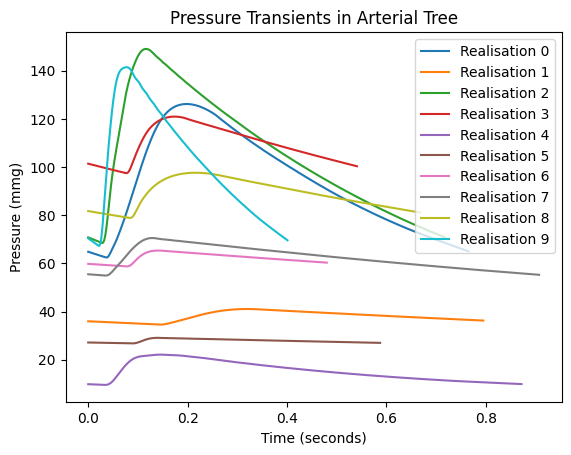

In [24]:
# Initialize the plot
fig, ax = plt.subplots()

# Loop over all realizations
for ind in range(len(test)): 
    # Adjust time and pressure trace for each realization
    t = test[ind].loc[ind]['T'] - test[ind].loc[ind]['T'].loc[0]  # Time adjustment
    p_pat = test[ind].loc[ind]['p_pat']  # Pressure transient

    # Plot the pressure transient for each realization
    ax.plot(t, p_pat, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Pressure (mmg)')
ax.set_title('Pressure Transients in Arterial Tree')

# Add legend to the plot
ax.legend()

# Display the plot
plt.show()

Here is the pressure trace in pulmonary arterial tree:

In [25]:
p_pat_raw = test[ind].loc[ind]['p_pat']
p_pat_raw

time_ind
0       70.399441
1       70.338728
2       70.278072
3       70.217471
4       70.156927
          ...    
996     69.813488
997     69.753297
998     69.693156
999     69.633066
1000    69.573030
Name: p_pat, Length: 1001, dtype: float64

In [26]:
T     = test[ind].loc[ind]['T'].values.copy()

In [27]:
T_resample = np.linspace(T[0], T[-1], 100)

If we want to resample we do these steps:

In [28]:
# Interpolate pressure for 100 timesteps from 1000
p_pat_resampled = np.interp(T_resample, T, p_pat_raw)
p_pat_resampled

array([ 70.39944086,  69.78873056,  69.18285811,  68.58056255,
        67.98253883,  67.39115738,  68.17093591,  74.42050845,
        85.3838061 ,  97.03996889, 107.33482956, 116.43736029,
       124.43359836, 130.88916446, 135.52903619, 138.46223861,
       140.07361209, 140.87234471, 141.27853557, 141.43942589,
       141.24069015, 140.50044198, 139.09894727, 137.4886346 ,
       136.38815258, 135.41247327, 134.00830434, 132.58321681,
       131.54865416, 130.49828291, 129.1406506 , 127.86409696,
       126.85907635, 125.76805064, 124.48102811, 123.3171604 ,
       122.32350615, 121.22182639, 120.01212648, 118.93083854,
       117.9434376 , 116.85344467, 115.71889715, 114.69776613,
       113.71775417, 112.65499936, 111.58860624, 110.61219173,
       109.6447669 , 108.61823523, 107.61124227, 106.67007334,
       105.72091069, 104.73510013, 103.77922734, 102.86783398,
       101.9421033 , 100.99802451, 100.08602497,  99.20206005,
        98.30363859,  97.40027706,  96.5265216 ,  95.66

Here is the cardiac output:

In [29]:
q_pat = test[ind].loc[ind]['q_pat'].values.copy()

In [30]:
q_pat

array([127.00469574, 126.91476646, 126.82474618, ..., 125.65624331,
       125.56775852, 125.47917687])

In [31]:
CO = np.sum(q_pat) * (T[1] - T[0]) / (T[-1] - T[0]) * 60. / 1000. # L / min
CO

11.302362583673458